# ANA 500 Week 1: Ddata Organization & Analysis
### Vincent Vitale
### Instructor: Professor Ghaznavy
### Date: October 5, 2025


In [22]:
# Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Airline data:
AIRLINE_DATA = r"C:\Users\vince\Desktop\School\ANA500\airline.csv"

# Organize Data

In [5]:
# View data first to ensure its loaded correctly:
airlines = pd.read_csv(AIRLINE_DATA)

airlines.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# Inspect the structure of the data
print("Shape:", airlines.shape)
airlines.info()

Shape: (129880, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location      

In [9]:
# First thing I want to do is change all the string value types to either binary or categorical 
# Gender: Male = 1, Female = 0
airlines['Gender'] = airlines['Gender'].map({'Male': 1, 'Female': 0})

# Customer Type: Loyal = 1, Disloyal = 0
airlines['Customer Type'] = airlines['Customer Type'].map({
    'Loyal Customer': 1,
    'disloyal Customer': 0
})

# Type of Travel: Business = 1, Personal = 0
airlines['Type of Travel'] = airlines['Type of Travel'].map({
    'Business travel': 1,
    'Personal Travel': 0
})

# Class: Business = 2, Eco Plus = 1, Eco = 0 (or adjust as you prefer)
airlines['Class'] = airlines['Class'].map({
    'Business': 2,
    'Eco Plus': 1,
    'Eco': 0
})

# Satisfaction: satisfied = 1, neutral or dissatisfied = 0
airlines['satisfaction'] = airlines['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# Validate the changes:
airlines[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,1,1,0,1,0
1,1,0,1,2,0
2,0,1,1,2,1
3,0,1,1,2,0
4,1,1,1,2,1


In [10]:
# Values look good, lets check for missing data now
airlines.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [12]:
# Since only 1 column has null values, need to find out why its null and if we need this data or not. 
# Compare missing vs non-missing delay values
missing_arrival = airlines[airlines['Arrival Delay in Minutes'].isnull()]
non_missing_arrival = airlines[airlines['Arrival Delay in Minutes'].notnull()]

print("Rows with missing Arrival Delay:", len(missing_arrival))
print("Rows without missing Arrival Delay:", len(non_missing_arrival))

# Average departure delay in both groups
print("Avg Departure Delay (missing):", missing_arrival['Departure Delay in Minutes'].mean())
print("Avg Departure Delay (non-missing):", non_missing_arrival['Departure Delay in Minutes'].mean())

Rows with missing Arrival Delay: 393
Rows without missing Arrival Delay: 129487
Avg Departure Delay (missing): 37.88549618320611
Avg Departure Delay (non-missing): 14.643385050236704


In [13]:
# Should check if there is a relationship between the missing values, and on time flights
airlines[airlines['Arrival Delay in Minutes'].isnull()][['Departure Delay in Minutes']].value_counts()

Departure Delay in Minutes
0                             147
4                              11
1                              11
2                              10
16                              6
                             ... 
116                             1
118                             1
119                             1
121                             1
530                             1
Name: count, Length: 121, dtype: int64

In [14]:
# Visualize the missing data too 
airlines[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [19]:
# Since the missing data is a small amount of the data, and its very closely related to on time departures im making
# the call to input the missing data with 0 values
airlines['Arrival Delay in Minutes'] = airlines['Arrival Delay in Minutes'].fillna(0)

# Verify all null values have been replaced
airlines['Arrival Delay in Minutes'].isnull().sum()

0

### Detecting Outliers on Flight Distance

In [20]:
q1, q3 = airlines["Flight Distance"].quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
airlines['Flight Distance_Capped'] = airlines["Flight Distance"].clip(lower=low, upper=high)

airlines[["Flight Distance", "Flight Distance_Capped"]].describe()

,Flight Distance,Flight Distance_Capped
count,129880.000000,129880.000000
mean,1190.316392,1186.995681
std,997.452477,988.394696
min,31.000000,31.000000
25%,414.000000,414.000000
50%,844.000000,844.000000
75%,1744.000000,1744.000000
max,4983.000000,3739.000000


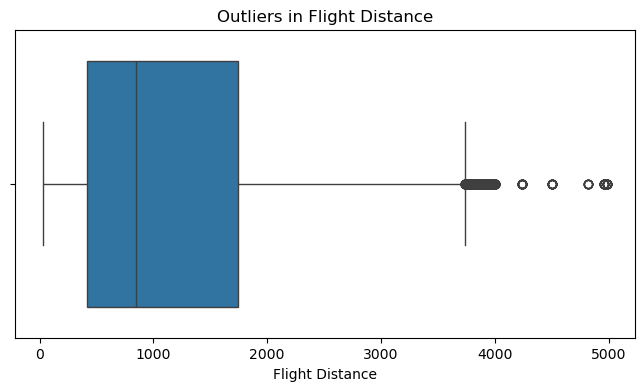

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x=airlines["Flight Distance"])
plt.title("Outliers in Flight Distance")
plt.show()

In [24]:
# I do have some outlier data, I have opted to not remove the data and instead just reassign it to the highest value of q3 of the iqr.
airlines["Flight Distance_Adjusted"] = np.where(
    airlines["Flight Distance"] > high, 
    high, 
    airlines["Flight Distance"]
)

airlines[["Flight Distance", "Flight Distance_Adjusted"]].describe()

,Flight Distance,Flight Distance_Adjusted
count,129880.000000,129880.000000
mean,1190.316392,1186.995681
std,997.452477,988.394696
min,31.000000,31.000000
25%,414.000000,414.000000
50%,844.000000,844.000000
75%,1744.000000,1744.000000
max,4983.000000,3739.000000


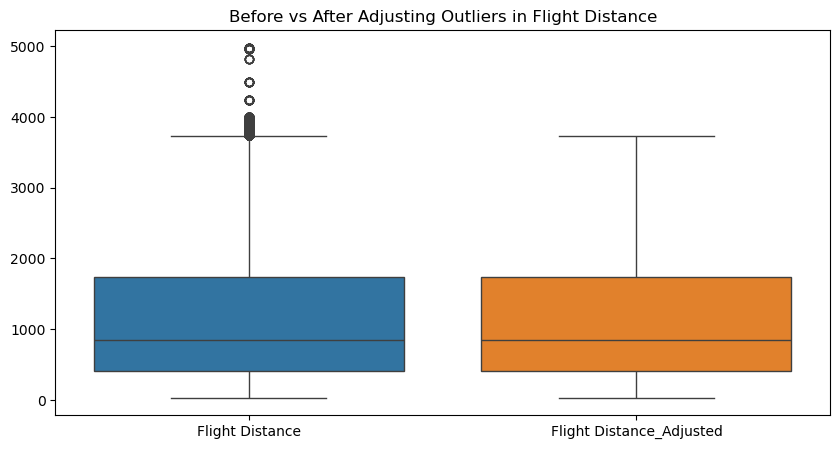

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=airlines[["Flight Distance", "Flight Distance_Adjusted"]])
plt.title("Before vs After Adjusting Outliers in Flight Distance")
plt.show()

# Analyzing Data
### Questions to answer now that our data is cleaned and organized:
### 1. Average Satisfaction by Class
### 2. Average Flight Distance by Type of Travel
### 3. Satisfaction by Customer Type
### 4. Pivot Table (Class vs Type of Travel)
### 5. Aggregate Average Departure Delay by Distance Range

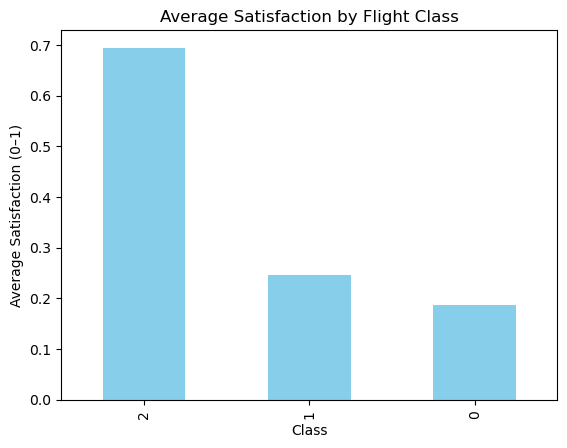

In [26]:
# Average satisfaction score by class
satisfaction_by_class = airlines.groupby("Class")["satisfaction"].mean().sort_values(ascending=False)
satisfaction_by_class

satisfaction_by_class.plot(kind="bar", title="Average Satisfaction by Flight Class", color="skyblue")
plt.xlabel("Class")
plt.ylabel("Average Satisfaction (0–1)")
plt.show()

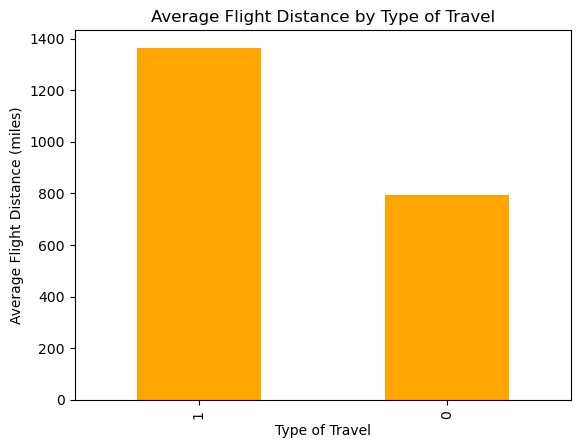

In [27]:
# Average Flight Distance by Type of Travel
distance_by_travel = airlines.groupby("Type of Travel")["Flight Distance_Adjusted"].mean().sort_values(ascending=False)
distance_by_travel

distance_by_travel.plot(kind="bar", title="Average Flight Distance by Type of Travel", color="orange")
plt.xlabel("Type of Travel")
plt.ylabel("Average Flight Distance (miles)")
plt.show()

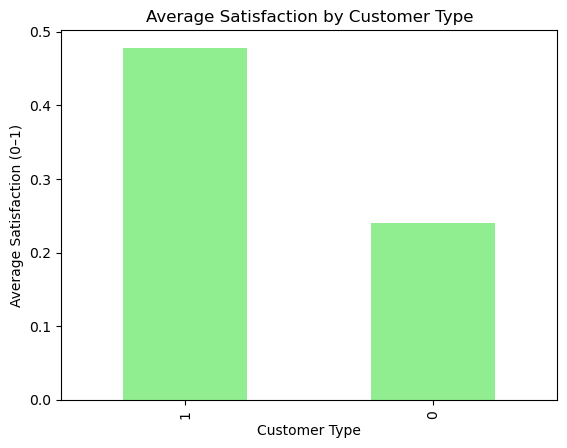

In [28]:
# Satisfaction by Customer Type
satisfaction_by_customer = airlines.groupby("Customer Type")["satisfaction"].mean().sort_values(ascending=False)
satisfaction_by_customer.plot(kind="bar", title="Average Satisfaction by Customer Type", color="lightgreen")

plt.xlabel("Customer Type")
plt.ylabel("Average Satisfaction (0–1)")
plt.show()

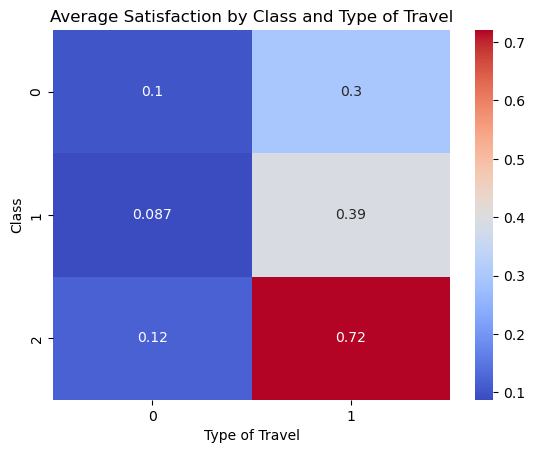

In [29]:
# Pivot Table (Class vs Type of Travel)
pivot_table = airlines.pivot_table(
    values="satisfaction",
    index="Class",
    columns="Type of Travel",
    aggfunc="mean"
)
pivot_table

sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title("Average Satisfaction by Class and Type of Travel")
plt.show()

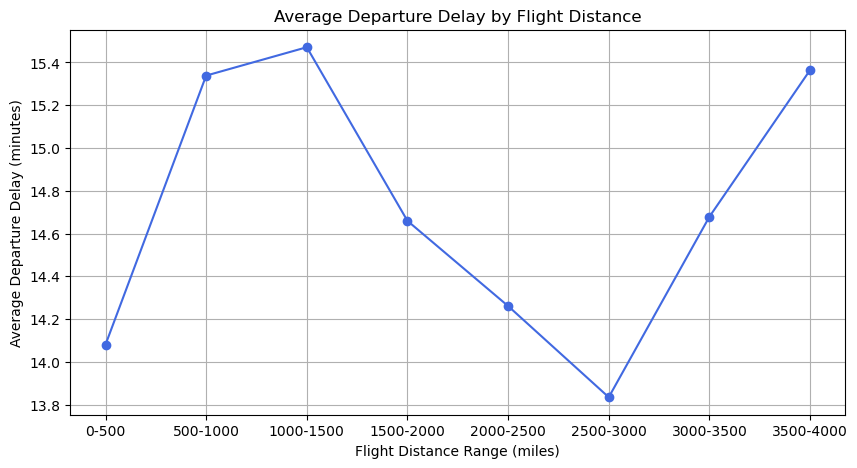

In [32]:
# Aggregate Average Departure Delay by Distance Range
# Create distance bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', 
          '2000-2500', '2500-3000', '3000-3500', '3500-4000']

airlines['DistanceGroup'] = pd.cut(
    airlines['Flight Distance_Adjusted'], 
    bins=bins, labels=labels, include_lowest=True
)

# Calculate average departure delay per distance group
avg_delay_by_distance = airlines.groupby("DistanceGroup", observed=True)["Departure Delay in Minutes"].mean()
avg_delay_by_distance

plt.figure(figsize=(10,5))
avg_delay_by_distance.plot(kind='line', marker='o', color='royalblue')
plt.title("Average Departure Delay by Flight Distance")
plt.xlabel("Flight Distance Range (miles)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True)
plt.show()